# Import Relevant Libraries

In [1]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from math import pi
import time 

from trend_radar_functions import (
    reset_index, 
    json_to_df, 
    combine_2_dfs,
    add_time_to_df,
    unique_seconds_list, 
    second_groupings, 
    seconds_dict, 
    unique_words_list,
    vectorize_to_df,
    words_df,
    trend_line,
    drop_time_from_df,
    create_dictionary_for_specified_time,
    top_5_dict_to_df,
    radar_plot_creator,
    )                             

# Load Cleaned DataFrame     
Cleaned = no hashtages, web links, @s... no punctuation, lowercase, lemmatized and no stop words

In [2]:
import pickle

with open('cleaned_twitter_df2.pkl', 'rb') as f:
    df = pickle.load(f)

Reset index

In [3]:
# def reset_index(df):
#     df = df.reset_index()
#     return df

# Load Vader Output

In [4]:
import pickle

with open('vader_output.pkl', 'rb') as f:
    vader_output = pickle.load(f)

Convert vader outputs to a dataframe

In [5]:
# def json_to_df(json_file):
#     df_sentiment = json_normalize(json_file)
#     return df_sentiment

Append vader outputs to original dataframe   
* Reset index of original df
* Turned vader sentiments json into df

In [6]:
# def combine_2_dfs(df1, df2):
#     df = pd.concat([df1, df2], axis=1)
#     return df

In [7]:
df = combine_2_dfs(reset_index(df),json_to_df(vader_output))

# Trend Lines

Create new .time. column showing hours, minutes, seconds

In [8]:
# def add_time_to_df(df1):
#     df1['.time.'] = df1['timestamp_ms'].apply(
#         lambda x: time.strftime('%H:%M:%S', 
#                                 time.gmtime(int(x)/1000)))
#     return df1

In [9]:
df = add_time_to_df(df)

List of every unique second in the data

In [10]:
# def unique_seconds_list(df):
#     unique_seconds = []
#     for times in df['.time.']:
#         all_times = []
#         all_times.append(times)
#         for i in all_times:
#             if not i in unique_seconds:
#                 unique_seconds.append(i)
#     return unique_seconds

In [11]:
unique_sec_list = unique_seconds_list(df)

Create a list that groups each second into either:

* five sec 5 - fifteen sec 15 - thirty sec 30 - 
* one min 60 - two min 120 - three min 180
* five min 300 - ten min 600 - fifteen min 900
* twenty min 1200 - thirty min 1800 - forty min 2400
* fifty min 3000 - sixty min 3600

In [12]:
# def second_groupings(seconds, seconds_list):
#     second_groups = []
#     for second in seconds_list:
#         if len(second_groups)==0:
#             second_groups.append(1)
#         elif len(second_groups)%seconds != 0:
#             second_groups.append(second_groups[-1])
#         else:
#             second_groups.append(second_groups[-1]+1)
#     return second_groups

In [13]:
second_group = second_groupings(5, unique_sec_list)

Turn the above list into a dictionary

In [14]:
# def seconds_dict(seconds, seconds_list):
#     second_dict = dict(zip(seconds_list, second_groupings(seconds, seconds_list)))
#     return second_dict

In [15]:
second_dict = seconds_dict(5, unique_sec_list)

Append dictionaries to the dataframe in new columns

In [16]:
all_relevant_seconds_for_grouping = [5,15,30,60,120,180,300,600,900,
                                     1200,1800,2400,3000,3600]

for i in all_relevant_seconds_for_grouping:
    df[str(i)+'_seconds'] = df['.time.'].map(seconds_dict(i, unique_sec_list))

Create SUM Trend Lines (5 second intervals)

In [17]:
# def trend_line(df1, seconds=5, sum_mean='sum'):

#     if sum_mean == 'sum':
#         temp_df = df1.groupby(str(seconds)+'_seconds').sum()
#         temp_df = temp_df.reset_index()
#     elif sum_mean == 'mean':
#         temp_df = df1.groupby(str(seconds)+'_seconds').mean()
#         temp_df = temp_df.reset_index()  

#     plt.plot(temp_df[str(seconds)+'_seconds'], temp_df['pos'], color='red')
#     plt.plot(temp_df[str(seconds)+'_seconds'], temp_df['neg'], color='grey')
#     plt.xlabel('Every 5 Seconds')
#     plt.ylabel('Sentiment')
#     plt.title('Nintendo E3 Twitter Sentiments (sum)')
#     plt.legend()
#     return plt.show()

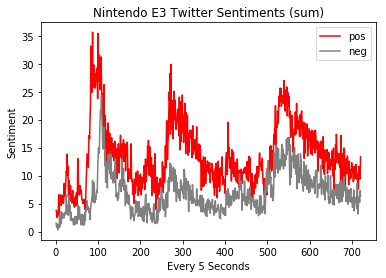

In [18]:
trend_line(df, 5, 'sum')

Create MEAN Trend Lines (5 second intervals)

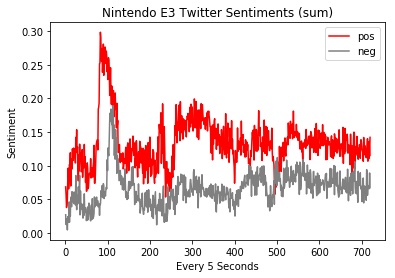

In [19]:
trend_line(df, 5, 'mean')

# Words DataFrame
### To be used for top positive/negative words (radar plots)

In [20]:
# def unique_words_list(df1):
#     total_words = []
#     for i in df1['text2']:
#         words = i.split()
#         for j in words:
#             total_words.append(j)

#     unique_words = [] 
#     for i in total_words:
#         if not i in unique_words:
#             unique_words.append(i)
#     return unique_words

In [21]:
# def vectorize_to_df(df1):
#     vectorizer = CountVectorizer(vocabulary=unique_words_list(df1))
#     vectorized_words = vectorizer.transform(df1['text2'])
#     word_array = vectorized_words.toarray()
#     matrix_df = pd.DataFrame(word_array, columns=unique_words_list(df1), index=df.index) 
#     return matrix_df


In [22]:
# def words_df(df1):
#     df = df1.rename(index=str, columns={"text": ".text.", "lang": ".lang.", "time":".time."})
#     df = df.drop('index', 1)
#     df = df.reset_index()
#     df = df.rename(index=str, columns={'index': 'df_index'})
#     matrix_df = vectorize_to_df(df1).reset_index()
#     matrix_df = matrix_df.rename(index=str, columns={'index': 'matrix_df_index'})
#     df_words = df.join(matrix_df)
#     return df_words


In [23]:
words_df = words_df(df)

# Top Words for Positive/Negative Sentiments

There are duplicate .time. columns, remove and replace

In [24]:
words_df = drop_time_from_df(words_df)
words_df = add_time_to_df(words_df)

In [25]:
# def drop_time_from_df(df1):
#     df1 = df1.drop('.time.', axis=1)
#     return df1

In [26]:
# def add_time_to_df(df1):
#     df1['.time.'] = df1['timestamp_ms'].apply(
#         lambda x: time.strftime('%H:%M:%S', 
#         time.gmtime(int(x)/1000))) 
#     return df1

In [27]:
# words_df = words_df.drop('.time.', axis=1)
# words_df['.time.'] = words_df['timestamp_ms'].apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(int(x)/1000)))

Create dictionary of top 5 positive/negative words

In [28]:
# def create_dictionary_for_specified_time (df1, time=1, which_five='top'): # choose either 'top' or 'bottom'
#     df_filtered_by_seconds = df1.loc[(df1['5_seconds']== time)]  #| (df_words['five_seconds']== 2)]
#     dict_by_seconds = df_filtered_by_seconds.to_dict(orient='index')
    
#     # create a cleaned dictionary for each word labeled by tweet number
#     list_of_word_dicts = []
#     for key1, val in dict_by_seconds.items():
#         u_words = val['text2'].split(' ')
#         neg = val['neg']
#         compound = val['compound']
#         neu = val['neu']
#         pos = val['pos']
#         for key, value in val.items():
#             try:
#                 value = float(value)
#                 if (value > 0) & (key in u_words) :
#                     list_of_word_dicts.append({ 
#                             'tweet_no': key1,
#                             key:{'count': 1, 'compound_sum': compound, 'neg_sum': neg, 
#                                  'neu_sum': neu, 'pos_sum': pos},
#                                                 })
#             except:
#                 pass
    
#     # remove duplicate words that appear several times in one tweet
#     no_dupl_list_of_word_dicts = [i for n, i in enumerate(list_of_word_dicts) 
#                                   if i not in list_of_word_dicts[n + 1:]]
    
#     return_dict = {}
#     for i in no_dupl_list_of_word_dicts:
#         for key, val in i.items():
#             if key is not 'tweet_no':
#                 if key not in return_dict.keys():
#                     return_dict.update({key : val})
#                 else:
#                     return_dict[key]['count'] += val['count']
#                     return_dict[key]['compound_sum'] += val['compound_sum']
#                     return_dict[key]['neg_sum'] += val['neg_sum']
#                     return_dict[key]['neu_sum'] += val['neu_sum']
#                     return_dict[key]['pos_sum'] += val['pos_sum']
                    
#     compound_dict = {}
#     for key, val in return_dict.items():
#         #print(key, val)
#         #compound_dict.update({key: val['compound_sum'] })
#         compound_dict[key] = val['compound_sum']
    
#     sorted_compound_dict = sorted(compound_dict.items(), key=lambda kv: kv[1])
    
#     if which_five == 'top':
#         #five_words = dict(sorted_compound_dict[0:5])
#         five_words = dict(sorted_compound_dict[-5:])
#     elif which_five == 'bottom': 
#         #five_words = dict(sorted_compound_dict[-5:])
#         five_words = dict(sorted_compound_dict[0:5])
#     else:
#         "Please choose either 'top' or 'bottom'."

#     return five_words

In [29]:
# def top_5_dict_to_df(df1, which_five='top'):  
#     top_5_df = pd.Series(create_dictionary_for_specified_time(df1, which_five=which_five))
#     top_5_df = pd.DataFrame(top_5_df)
#     top_5_df = top_5_df.T
#     top_5_df['group'] = 'A'
#     return top_5_df

In [ ]:
#create_dictionary_for_specified_time(words_df, 1, 'top')

In [ ]:
#top_5_dict_to_df(words_df, 'top')

# Radar Plots

In [ ]:
#top_5_dict_to_df(words_df, 'top')

In [ ]:
# def radar_plot_creator(df1, which_five='top'):
#    # Set data
#     radar_df_test = top_5_dict_to_df(df1, which_five)

#     # number of variable
#     categories=list(radar_df_test)[1:]
#     N = len(categories)

#     # We are going to plot the first line of the data frame.
#     # But we need to repeat the first value to close the circular graph:
#     values=radar_df_test.loc[0].drop('group').values.flatten().tolist()
#     values += values[:1]
#     values

#     # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
#     angles = [n / float(N) * 2 * pi for n in range(N)]
#     angles += angles[:1]

#     # Initialise the spider plot
#     ax = plt.subplot(111, polar=True)

#     # Draw one axe per variable + add labels labels yet
#     plt.xticks(angles[:-1], categories, color='grey', size=8)

#     # Draw ylabels
#     ax.set_rlabel_position(0)
#     plt.yticks([-3,-2,-1,0,1,2,3], ["","","", 0, "", "", ""], color="grey", size=7)
#     plt.ylim(-3,3)

#     # Plot data
#     if which_five == 'top':
#         ax.plot(angles, values, linewidth=1, linestyle='solid', color='red')
#     elif which_five == 'bottom':
#         ax.plot(angles, values, linewidth=1, linestyle='solid', color='grey')

#     # Fill area
#     if which_five == 'top':
#         testing_radar = ax.fill(angles, values, 'red', alpha=0.1);  
#     elif which_five == 'bottom':
#         testing_radar = ax.fill(angles, values, 'grey', alpha=0.1);  
    
#     return testing_radar

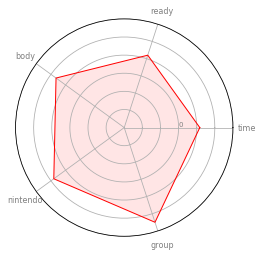

In [32]:
radar_plot_creator(words_df, 'top')
#words_df, 'top' 5 or 'bottom' 5, second grouping type in seconds